In [1]:
import os
import glob
from natsort import natsorted
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [2]:
data_dir = "/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k"

In [3]:
paths = glob.glob(data_dir + "/*_mask.png")

In [4]:
#
#paths

In [43]:
sorted_paths = natsorted(paths)

In [44]:
test_img = Image.open(sorted_paths[0])

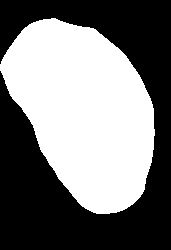

In [45]:
test_img

In [46]:
one_channel = np.array(test_img)[:,:,0]

In [47]:
one_channel.shape

(250, 171)

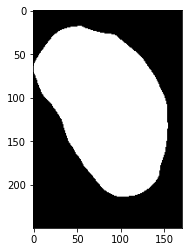

In [48]:
plt.imshow(one_channel, cmap="gray")

In [16]:
def analyse_mask_from_path_list(paths:list):
    
    df_mask_stat = pd.DataFrame(columns=["mask_path", "height", "width", "resolution", "num_true_pixels", "true_pixel_per"])
    
    #df_csvs = pd.DataFrame(columns=["image_path", "mask_path"])
    
   # for csv_path in csv_paths:
    #    df_temp = pd.read_csv(csv_path)
   #     df_csvs = df_csvs.append(df_temp, ignore_index=True)
        
    #df_csvs = df_csvs[:amount_to_consider]
   # print(len(df_csvs))
    
    for mask_path in tqdm(paths):
        
        record = {}
        #mask_path = os.path.join(mask_dir,mask)
        img = Image.open(mask_path)
        img = np.array(img)
        img = img > 127 # get only True and False values
        
        img = img[:,:,0] # get only one channel
        
        height = img.shape[0]
        width = img.shape[1]
        
        resolution= height * width
        
        true_pixels = img.sum()
        
        percentage = (true_pixels/resolution) * 100 
        
        record = {"mask_path": mask_path, "height": height, "width": width, "resolution": resolution, "num_true_pixels": true_pixels, "true_pixel_per": percentage}
        
        df_mask_stat = df_mask_stat.append(record, ignore_index=True)
        
    return df_mask_stat

In [17]:
df_all_fakes = analyse_mask_from_path_list(paths)

100%|██████████| 10000/10000 [00:23<00:00, 419.90it/s]


<Figure size 2880x2880 with 0 Axes>

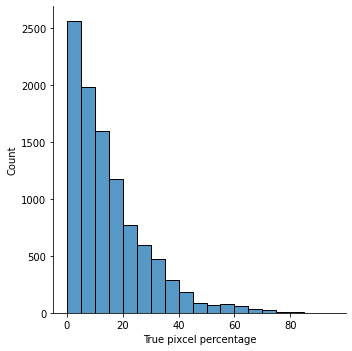

In [20]:
df = df_all_fakes

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_all_10k_fakes.pdf")

In [23]:
paths_id_1 = glob.glob(data_dir + "/chk_id_1_*_mask.png")

In [24]:
paths_id_1

['/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_1_gen_scale_0_7_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_1_gen_scale_0_4_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_1_gen_scale_0_0_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_1_gen_scale_0_8_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_1_gen_scale_0_3_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_1_gen_scale_0_6_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_1_gen_scale_0_2_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_1_gen_scale_0_9_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_1_gen_scale_0_5_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_1_gen_scale_0_1_mask.png']

In [5]:
def stack_masks(img_paths):
    
    all_masks = []
    
    for path in img_paths:
        img = Image.open(path)
        img_ch_0 = np.array(img)[:,:,0]
        
        all_masks.append(img_ch_0)
        
    stacked_masks = np.stack(all_masks, axis=2)
        
    #print(len(all_masks))
    #print(stacked_masks.shape)
    return stacked_masks

In [48]:
stk_msks = stack_masks(paths_id_1)

In [49]:
#stack_masks

In [51]:
#stk_msks

In [53]:
mean = np.mean(stk_msks, axis=2)

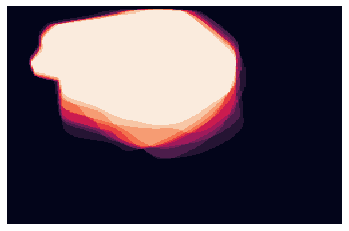

In [92]:
#plt.figure()
ax = sns.heatmap(mean, vmin=0, vmax=255, xticklabels=False, yticklabels=False, cbar=False)

fig = ax.get_figure()
fig.savefig("mean_id_1.pdf")


In [56]:
std = np.std(stk_msks, axis=2)

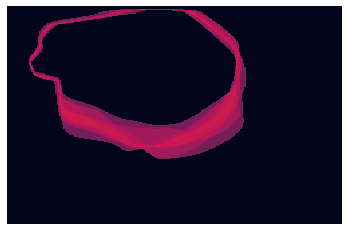

In [75]:
ax = sns.heatmap(std, vmin=0, vmax=255,  xticklabels=False, yticklabels=False, cbar=False)
fig = ax.get_figure()
fig.savefig("std_id_1.pdf")

In [12]:
def plot_mean_and_std(img_id):
    
    paths = glob.glob(data_dir + f"/chk_id_{img_id}_*_mask.png")
    stk_msks = stack_masks(paths)
    
    mean = np.mean(stk_msks, axis=2)
    std = np.std(stk_msks, axis=2)
    
    plt.figure()
    ax = sns.heatmap(mean, vmin=0, vmax=255, xticklabels=False, yticklabels=False, cbar=True)
    fig = ax.get_figure()
    fig.savefig(f"mean_id_{img_id}.png")
    
    plt.figure()
    ax = sns.heatmap(std, vmin=0, vmax=255,  xticklabels=False, yticklabels=False, cbar=True)
    fig = ax.get_figure()
    fig.savefig(f"std_id_{img_id}.png")
    
    
    

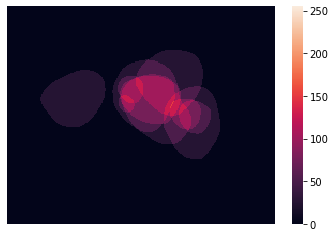

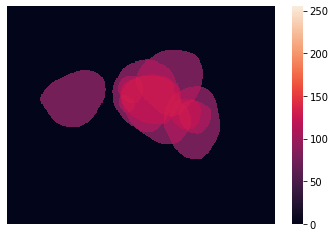

In [15]:
plot_mean_and_std(103)

In [76]:
#list(std)